In [84]:
import random as rand
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from matplotlib.image import imread



In [94]:
#@title Inputs
safe_places = 3 #@param {type:"number"}
population_places = 5 #@param {type:"number"}
maximum_time= 3 #@param {type:"slider", min:1, max:30, step:0.1}
image = "" #@param {type:"string"}
new_set = False #@param {type:"boolean"}

In [95]:
# euclidean distance
def dis(p0, p1):
  return (abs(x[p0]-x[p1])**2+abs(y[p0]-y[p1])**2)**0.5

[[2, 4, 6, 7], [2, 3, 4, 5, 7], [0, 1, 3, 4, 6, 7], [1, 2, 4, 5, 6, 7], [0, 1, 2, 3, 6, 7], [1, 3], [0, 2, 3, 4, 7], [0, 1, 2, 3, 4, 6]]


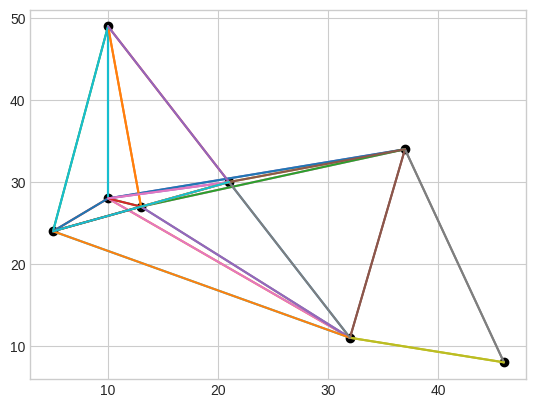

In [96]:
#generating the graph
points_number=safe_places+population_places
if new_set:
  x = [rand.randint(0,50) for _ in range(0,points_number)]
  y = [rand.randint(0,50) for _ in range(0,points_number)]
  w = [rand.randint(1,6) for _ in range(0,points_number)]
# Load the image
if image!="":
  img = imread(image)
  plt.imshow(img, extent=[0, 55, 0, 55], aspect='auto')
plt.plot(x, y, 'o', color='black');
max_len = maximum_time*10
edges= [[] for _ in range(points_number)]
for i in range(points_number):
  for j in range(i):
    if dis(i,j)<=max_len:
      edges[i].append(j)
      edges[j].append(i)
print(edges)
for i in range(points_number):
  for j in edges[i]:
    plt.plot([x[i],x[j]],[y[i],y[j]])
    
plt.savefig("a")
plt.show()

In [107]:
def distance_score(t):
  return -t

In [108]:
comb = combinations(list(range(points_number)), safe_places)
best_score=1e18
best_places =[]
for safe_places_tuble in comb:
  score = 0
  for point in range(points_number):
    for safe_point in safe_places_tuble:
      if safe_point in edges[point]:
        score+=distance_score(dis(safe_point,point))      
  if best_score>score:
    best_score=score
    best_places = list(safe_places_tuble)

print(best_places) 
print(best_score)


[2, 3, 4]
-18


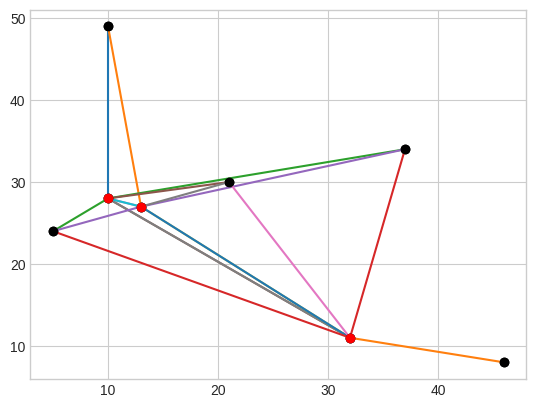

In [109]:
plt.clf()
plt.plot(x, y, 'o', color='black');
for point in range(points_number):
  for safe_point in best_places:
    if safe_point in edges[point]:
      plt.plot([x[safe_point],x[point]],[y[safe_point],y[point]])
plt.plot(x, y, 'o', color='black');
for v in best_places:
  plt.plot(x[v], y[v], 'o', color='red');

plt.savefig("b")
  